# Memo RAG: Enhancing Complex Query Handling through Memory and Retrieval





Memo RAG is an innovative framework that combines memory and retrieval mechanisms to effectively handle complex queries. By utilizing a memory model that generates draft answers, Memo RAG guides the search for relevant external information. This approach allows the retriever to gather pertinent data from databases, which a more powerful language model then uses to create a comprehensive final answer. Memo RAG is particularly adept at managing ambiguous queries and efficiently processing large amounts of information across various tasks.



## Key Features of Memo RAG



- **Dual-System Architecture**: Memo RAG employs a dual-system approach, utilizing a lightweight memory model for initial answer generation and a more expressive language model for final output generation.

- **Memory Model**: This component generates draft answers that serve as clues, guiding the retrieval process to locate relevant information efficiently.

- **Retriever Integration**: The retrieval mechanism gathers pertinent data from external databases, ensuring that the final answer is well-informed and contextually relevant.

- **Contextual Awareness**: By leveraging memory, Memo RAG can manage ambiguous queries effectively, recalling relevant information that aids in understanding user intent.




## How Memo RAG Works


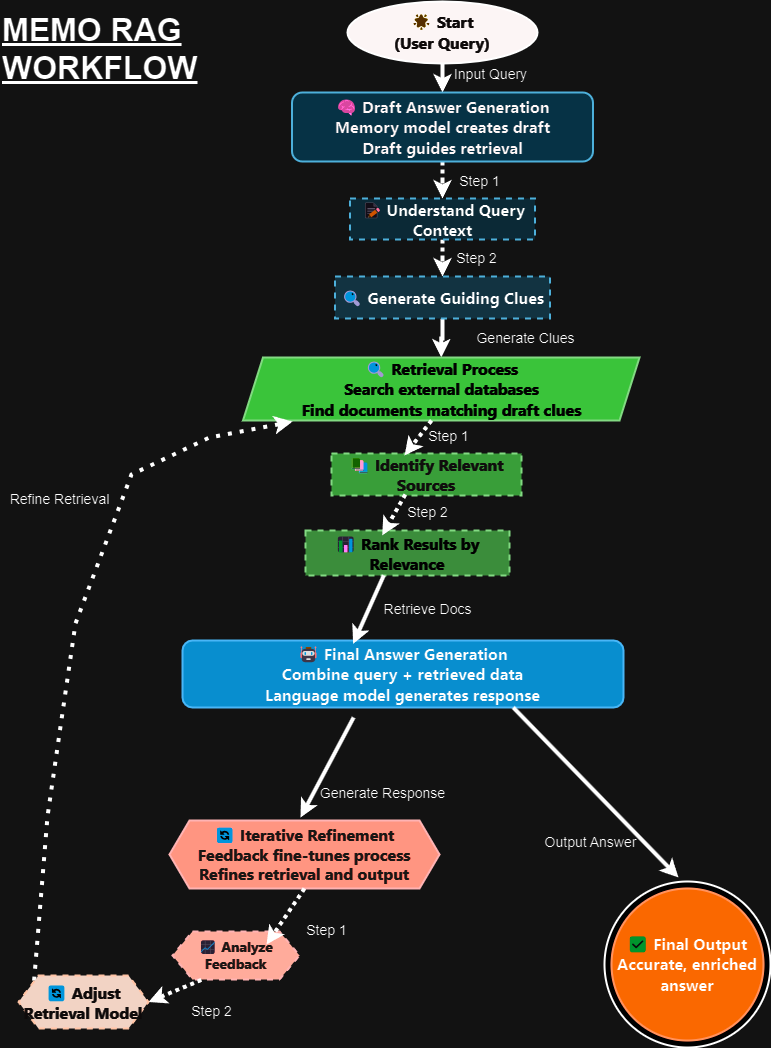


1. **Draft Answer Generation**:
   - Upon receiving a query, the memory model generates an initial draft answer based on its understanding and knowledge.
   - This draft serves as a clue for the subsequent retrieval process.

2. **Retrieval Process**:
   - The retriever uses the generated draft answer to search for relevant information within external databases.
   - Relevant documents are identified based on their connection to the clues provided by the memory model.

3. **Final Answer Generation**:
   - The expressive language model takes both the initial query and the retrieved documents to generate a comprehensive final answer.
   - This final output is informed by both the draft answer and the additional context provided by retrieved data.

4. **Iterative Refinement**:
   - The system can iteratively refine its responses based on feedback or additional context provided during interactions, enhancing its performance over time.


In [ ]:
!pip install pypdf2 groq

In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and process the PDF document (BERT paper)
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # BERT paper URL
pdf_path = "BERT_paper.pdf"

In [ ]:
# Download the PDF from the URL
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
# Extract text from the PDF
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Define the query and create an evaluation dataset
query = "What is Next Sentence Prediction (NSP)?"
evaluation_dataset = [
    {"query": query, "expected_output": "Description of Next Sentence Prediction (NSP)"}
]

In [ ]:
# Step 3: Chunk the document for processing
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Divide document into manageable chunks

In [ ]:
# Step 4: Draft Answer Generation (Memory Model)
draft_answer = "Next Sentence Prediction (NSP) is a pre-training task used in BERT to predict if two sentences appear consecutively in a document."

In [ ]:
# Step 5: Document Retrieval - Retrieve the most relevant chunks using cosine similarity
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
# Calculate cosine similarity
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 5  # Retrieve the top 5 most relevant chunks
retrieved_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in retrieved_chunk_indices]

In [ ]:
# Step 6: Final Answer Generation - Combine draft answer and retrieved chunks to generate the final answer
final_answer = draft_answer + "\n\nRelevant Retrieved Chunks:\n"
for idx, chunk in enumerate(retrieved_chunks, start=1):
    final_answer += f"Chunk {idx}: {chunk[:200]}...\n"  # Display first 200 characters of each chunk

In [ ]:
# Step 7: Send to Groq API for final answer generation
try:
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are an advanced assistant that generates answers based on retrieved information."},
            {"role": "user", "content": f"Based on the query '{query}' and the draft answer '{draft_answer}', along with these retrieved chunks:\n{final_answer}\nGenerate a final response."},
        ],
        model="llama3-8b-8192",  # Example model from Groq API
    )
    generated_answer = response.choices[0].message.content
    print(f"Generated Final Answer: {generated_answer}")
except Exception as e:
    print(f"Error generating answer: {e}")

Generated Final Answer: Here is a comprehensive answer based on the retrieved information:

Next Sentence Prediction (NSP) is a pre-training task used in BERT to predict if two sentences appear consecutively in a document. This task is designed to help the model understand the relationship between two sentences and improve its overall performance in downstream tasks such as Question Answering (QA) and Natural Language Inference (NLI).

According to research, NSP was shown to improve the performance of BERT in various tasks, including MRPC, SST-2, SQuAD, and LI (as seen in Table 1). In fact, when NSP is not used, the model's performance drops, demonstrating the importance of this pre-training task.

In contrast to other language models, BERT is trained using a bidirectional Transformer architecture (Figure 3), which allows it to capture the context from both sides of a sentence. This is in contrast to other models, such as OpenAI GPT, which uses a left-to-right Transformer.

It's worth 

## Code Explanation

## Groq API Initialization
The Groq client is initialized using the API key to interact with the Groq language model for query response generation.

## Download and Process PDF
The BERT paper PDF is downloaded from a specified URL and saved locally. The text is extracted using the PyPDF2 library for further processing.

## Query Definition
A query, "What is Next Sentence Prediction (NSP)?" is defined to ask the model about the NSP task.

## Draft Answer Generation
An initial draft answer is manually created to provide a starting point for the Memo RAG process.

## Document Retrieval
The extracted text is split into chunks of 1000 characters. TF-IDF is used to convert these chunks into embeddings, and cosine similarity is calculated to find the top relevant chunks related to the query.

## Final Answer Generation
The system combines the draft answer with the retrieved chunks to form a comprehensive answer, providing context from the retrieved information.

## Groq API Call
The Groq API is called with the combined input (draft answer and relevant chunks) using the llama3-8b-8192 model to generate the final response.


## Applications of Memo RAG



- **Complex Question Answering**: Particularly effective in scenarios requiring nuanced understanding and multi-hop reasoning across large datasets.

- **Knowledge Management Systems**: Facilitates efficient access to information while ensuring accuracy in responses based on comprehensive data retrieval.

- **Content Creation Tools**: Assists writers by generating context-rich narratives that draw from extensive knowledge bases.

- **Educational Platforms**: Enhances learning applications by providing accurate information tailored to student queries with deeper contextual understanding.



## Advantages of Memo RAG



- **Improved Handling of Ambiguous Queries**: The memory system enables the model to infer user intent even when queries are implicit or incomplete, leading to more accurate responses.

- **Efficient Information Processing**: By generating draft answers that guide retrieval, Memo RAG can efficiently process large volumes of information and provide comprehensive answers.

- **Enhanced Contextual Understanding**: The integration of memory allows for deeper contextual understanding, bridging gaps between raw input and meaningful responses.

- **Versatility Across Tasks**: Memo RAG performs well across various tasks, including those requiring multi-hop reasoning or complex summarization.



## Limitations of Memo RAG



- **Complexity in Implementation**: The dual-system architecture may introduce complexity in design and require careful management of interactions between the memory model and retrieval components.

- **Dependence on Quality of Retrieved Information**: The effectiveness of Memo RAG relies heavily on the quality and relevance of the documents retrieved; poor-quality sources can lead to inaccurate outputs.

- **Resource Intensive**: The need for maintaining a memory system alongside retrieval mechanisms may require significant computational resources, especially for large datasets.


## Conclusion



Memo RAG represents a significant advancement in retrieval-augmented generation methodologies by integrating memory capabilities with traditional retrieval mechanisms. This combination allows it to handle complex queries effectively while maintaining accuracy and relevance in responses. As AI continues to evolve, frameworks like Memo RAG will play an essential role in enhancing how models interact with vast amounts of data across diverse applications.



Having explored Memo RAG, we will now move on to Attention-Based RAG.